#IRIS FLOWER CLASSIFICATION (Codsoft)

Importing the necessary dependencies

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

Loading the Dataset from Google Drive

In [84]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Load the dataset

In [85]:
path = '/content/drive/MyDrive/CodSoft/IRIS.csv'
data = pd.read_csv(path , encoding='latin-1')

Exploring the data


Display the first few rows of the dataset

In [86]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Display concise summary of the dataset

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Display the shape of the dataset

In [89]:
data.shape

(150, 5)

Display the size of the dataset

In [90]:
data.size

750

Cheking the Statistical informstion of the data

In [91]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Cleaning

Checking for null/missing values in the dataset

In [92]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Display the distribution of the target variable (species)

In [93]:
data['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [94]:
data.shape

(150, 5)

### Encoding the Categorical Columns

In [95]:
# Encode the categorical 'species' column to numerical values for modeling
data.replace({"species": {"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}}, inplace=True)

In [96]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### DATA VISUALIZATION

Pair plot to visualize relationships between variables

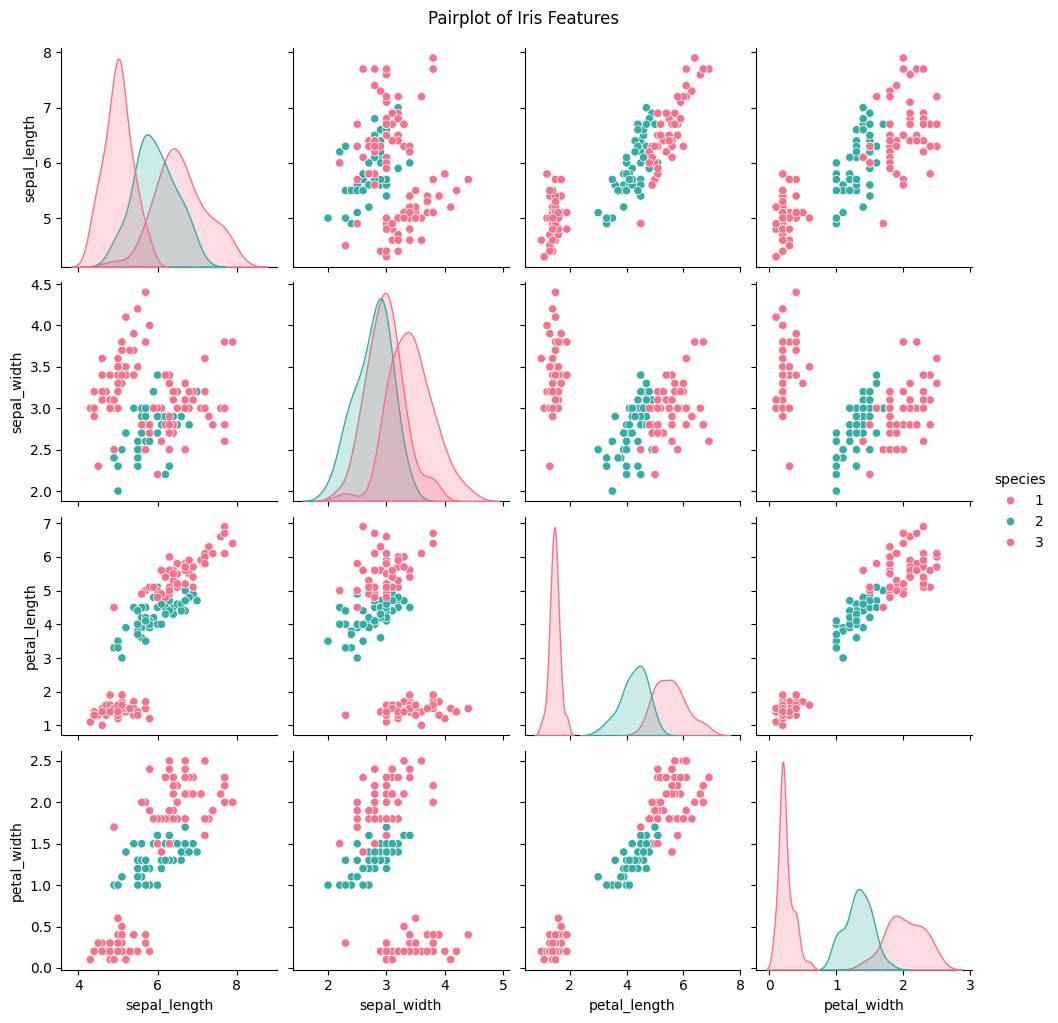

In [97]:
sns.pairplot(data, hue="species", palette="husl")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

Correlation Heatmap to see how features are correlated

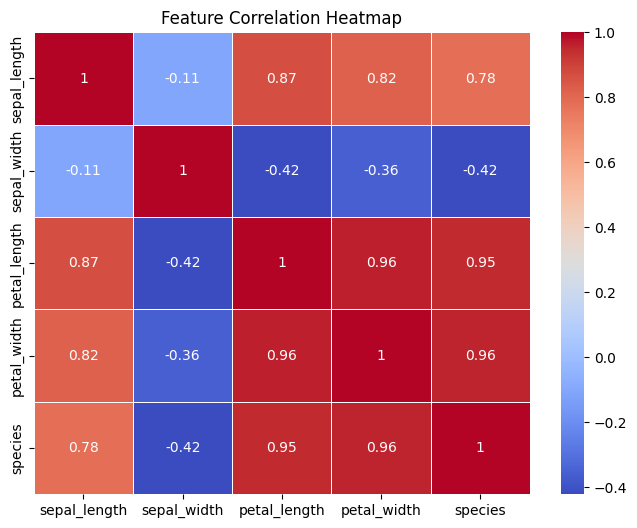

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### Separate the dataset into features (X) and target variable (y)

In [99]:

x = data.drop('species', axis=1)
y = data[['species']]

In [100]:

print(x.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   species
0        1
1        1
2        1
3        1
4        1



Splitting the data into Train and Test data (80% train, 20% test)

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [102]:
# Check the shapes of the resulting datasets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


### Train and evaluate three different models: Logistic Regression, Random Forest, and Decision Tree

 Logistic Regression model

In [103]:
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Random Forest model

In [104]:
model_2 = RandomForestClassifier()
model_2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

Decision Tree model

In [105]:
model_3 = DecisionTreeClassifier()
model_3.fit(x_train, y_train)

DecisionTreeClassifier()

### Model Evaluation

In [106]:
# Make predictions and evaluate the model_1
y_pred_1 = model_1.predict(x_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

# Make predictions and evaluate the model_2
y_pred_2 = model_2.predict(x_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

# Make predictions and evaluate the model_3
y_pred_3 = model_3.predict(x_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)

Display the accuracy scores for each model

In [107]:
print("\nModel Evaluation Results:")
print(f"Logistic Regression Accuracy: {accuracy_1:.4f}")
print(f"Random Forest Accuracy: {accuracy_2:.4f}")
print(f"Decision Tree Accuracy: {accuracy_3:.4f}")


Model Evaluation Results:
Logistic Regression Accuracy: 0.9667
Random Forest Accuracy: 0.9667
Decision Tree Accuracy: 0.9333
